# Example Jupyter Notebook

Here I present an exemple of how to use DustyPY. In this tutorial we will use Betelgeuse as an exemple.

### Set up a Model

The first thing to do is to create your model. In the case of Betelgeuse, we have a single star with a Temperature around 3500 K:


In [1]:
from DustyPY.stars import Star

S = Star(Name='E1',Temperature=3500,Luminosity=1)

Note: For a single star, the Luminosity must always be 1 as it is the contribution of this star to the total luminosity of the model.

Then we need to create the dust around. We refer to this paper for the dust composition and grain size distribution [Cannon et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A&A...675A..46C)

In [31]:
from DustyPY.stars import Dust

Composition = {'Al2O3-comp':0.2,'MgFeSiO4':0.16,'Ca2Al2SiO7':0.64}
DustSize = {'amin' : 0.01, 'amax': 1}  #Size in microns
tau = 1 #Optical depth of the dust shell at 0.55 microns to be fitted

dust = Dust(Composition=Composition, DustSize=DustSize, tau=tau)

With this we can create our model with a distance of 197 pc [Graham et al. 2008](https://iopscience.iop.org/article/10.1088/0004-6256/135/4/1430):

In [32]:
from DustyPY.stars import Model

model = Model(Name='Betelgeuse', NbStar=1, Stars=[S], Dust=dust, distance = 197.0) 

Then we need to create the dusty object and give him the dusty PATH on your machine and the model:

In [33]:
from DustyPY.dusty import Dusty

Path = '/Users/gabriel/Documents/Stage/code/dustyV2/' #Replace with the path to the dusty directory

dusty = Dusty(PATH=Path, Model=model,Lestimation=1.8e5)

### Add the data

Once the dusty file is set with the model, we can import the data. To do this you can either import your own data like follow:

In [13]:
from DustyPY.Data import Data

data = Data()

d = data.ImportData('Path_to_Data') #Replace with the path to the data

data.set_xdata(xdata) #Replace with the x data, Wavelength in microns
data.set_ydata(ydata) #Replace with the y data, Flux in W/m2 or Jy
data.set_yerr(yerr)

FileNotFoundError: [Errno 2] No such file or directory: 'Path_to_Data'

Or you can use the built in querry to reitrive the photometry from Vizier:

In [29]:

Dat = Data()

table = Dat.QuerryVizierData(radius = 5, target='Betelgeuse')
Dat.SetVizierData(table)

If needed, you can restrict the data to a subset using the method RestrictData():

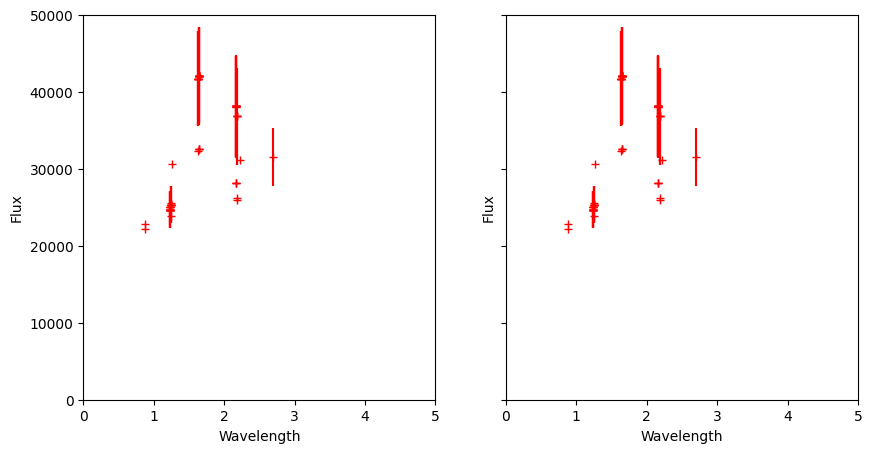

In [28]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.ScatterData(xlim=(0,5),ylim=(0,5e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.RestrictData(['ydata > 20000'])
Dat.ScatterData(xlim=(0,5),ylim=(0,5e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


You can also unred the data using the Fitzpatrick parameterization ([Fitzpatrick et al. 1999](https://ui.adsabs.harvard.edu/abs/1999PASP..111...63F))

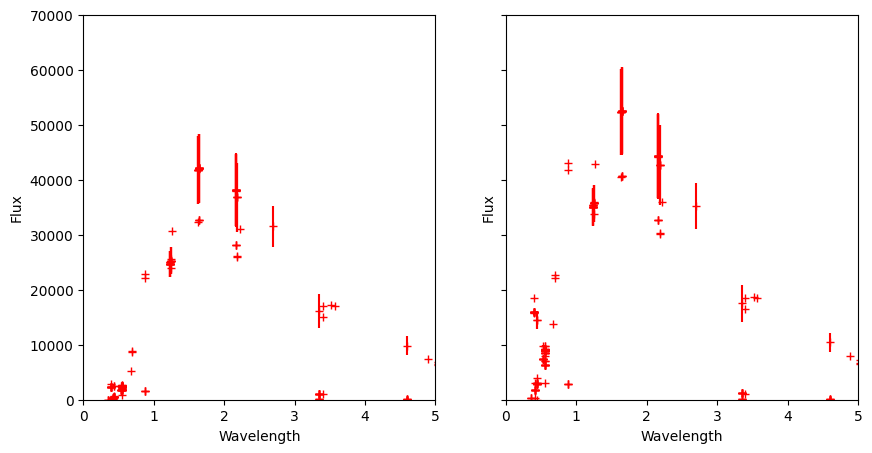

In [40]:
fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.SetVizierData(table)
Dat.ScatterData(xlim=(0,5),ylim=(0,7e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.UnredData(EBV=0.470)
Dat.ScatterData(xlim=(0,5),ylim=(0,7e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


### Lunch Model

Once the model is setup, you can lunch dusty and extract the results.

here


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


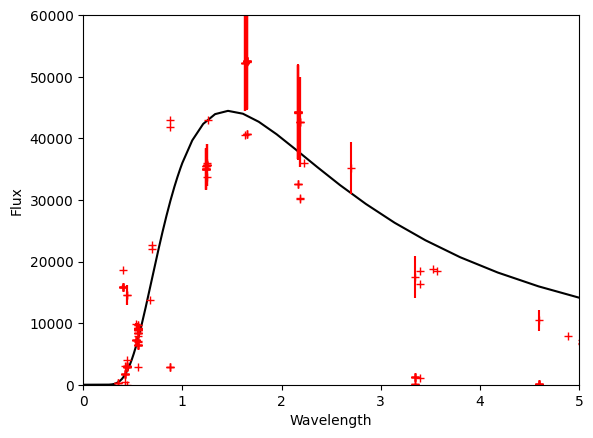

In [39]:
#Change the parameter file and lunch dusty
dusty.ChangeParameter()
dusty.LunchDusty()


#Retrieve the results SED and plot it
dusty.MakeSED(distance=dusty.get_Model().get_Distance())

fig,ax = plt.subplots()
dusty.PlotSED(xlim=(0,5),ylim=(0,6e4), ax=ax, kwargs={'color':'k'})
Dat.ScatterData(xlim=(0,5),ylim=(0,6e4), ax=ax, kwargs={'fmt':'+', 'color':'r'})

### Fit Model

Finaly, DustyPY offer a convenient way to fit a model to the data using the librarie [pymcmcstat](https://github.com/prmiles/pymcmcstat.git).

In [41]:
from DustyPY.DustyFit import DustyFit

#Initialize the DustyFit object
fit = DustyFit(dusty, Data=Dat)

#Initialize the Parameter to Fit
#For the Temperature/Luminosity of the stars, always put the number of the star, 
# in the same order as the listed stars, after Temp ex: Temp1, Lum1, Temp2, Lum2,...)
Param = {'Temp1':{'theta0':3500,'minimum':2000,'maximum':4000}, 
         'Opacity':{'theta0':1,'minimum':0.1,'maximum':4},
    }

#Initialize the parameter of the MCMC
ParamFit = {
                        'nsimu': 1000,         #Number of iteration (larger is better but slow due to the dusty runtime)   
                        'updatesigma': True,  #Update the sigma of the likelihood function
                        'method': 'dram',     #Sampling method
                        'adaptint': 100,      #Number of interates between adaptation.
                        'verbosity': 0,       #0=No output, 1=Output
                        'waitbar': True,      #Display a waitbar
                    }

#Set the parameters
fit.set_Param(Param)
fit.set_ParamFit(ParamFit)

#Run the MCMC and get results
fit.LunchFit()
fit.get_Fit().PrintResults()

AttributeError: type object 'DustyFit' has no attribute 'DustyFit'